In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib import cm
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["Blue","saddlebrown"])                    #motabeghe algoritm
from numba import njit

In [ ]:
def lattice(L):
    l=np.ones((L,L))
    return L**2 * l

In [ ]:
def probability(LATTICE,L):
    TOTAL=list(LATTICE[-1])
    L2_number=TOTAL.count(L**2)
    zeros=len(TOTAL)-L2_number
    if zeros!=0:
        return 1 , zeros/L**2
    else:
        return 0 , zeros/L**2

In [ ]:
L=16
c=1
LATTICE=lattice(L)
LATTICE[0]=np.zeros(L)

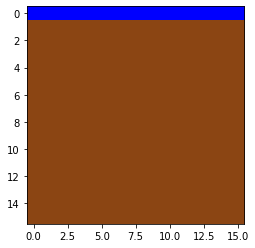

In [ ]:
plt.imshow(LATTICE,cmap=cmap)

In [ ]:
@njit
def percolation(lattice,c,p1):
 for i in range(L):
    for j in range(L):
        r=np.random.random()
        if r<p1:
            if lattice[i+1][j-1]==L**2 and lattice[i][j]==L**2:
                lattice[i+1][j]=c
                c+=1
            elif lattice[i+1][j-1]==L**2 and lattice[i][j]!=L**2:
                 lattice[i+1][j]=lattice[i][j]
            elif lattice[i+1][j-1]!=L**2 and lattice[i][j]==L**2:
                  lattice[i+1][j]=lattice[i+1][j-1]
            elif lattice[i+1][j-1]!=L**2 and lattice[i][j]!=L**2:
                if lattice[i+1][j-1]< lattice[i][j]:
                    for p in range(L):
                        for q in range(L):
                            if lattice[p][q]!=L**2:
                                lattice[p][q]=lattice[i+1][j-1]
                elif lattice[i+1][j-1]> lattice[i][j]:
                    for p in range(L):
                        for q in range(L):
                            if lattice[p][q]!=L**2:
                                lattice[p][q]=lattice[i][j]

 return lattice

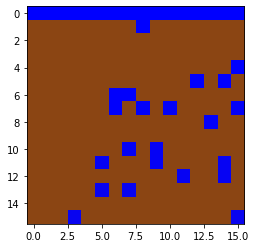

In [ ]:
final=percolation(LATTICE,1,0.1)                   #p=0.1
plt.imshow(final,cmap=cmap)

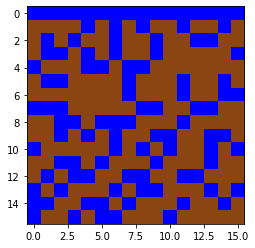

In [ ]:
L=16                                             #p=0.4
c=1
LATTICE=lattice(L)
LATTICE[0]=np.zeros(L)
final=percolation(LATTICE,1,0.4)
plt.imshow(final,cmap=cmap)

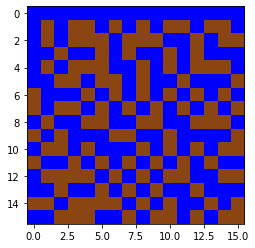

In [ ]:
L=16                                            #p=0.7
c=1
LATTICE=lattice(L)
LATTICE[0]=np.zeros(L)
final=percolation(LATTICE,1,0.7)
plt.imshow(final,cmap=cmap)